In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.listdir('/kaggle/input/')

['titanicdataset-traincsv']

In [4]:
#Create a datafram  from a csv file
df = pd.read_csv("..//input/titanicdataset-traincsv/train.csv")
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


A short description of what the columns represent

Variable Name | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
# Inspecting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.shape      # Check dimensions

(891, 12)

In [8]:
# Getting a quick look at all the numerical data and their 
# descriptive statistics include those that summarize the central tendency,
# dispersion and shape of a dataset’s distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(df["Age"].isnull().sum())

177


In [10]:
import numpy as np
df["Age"] = np.where(df["Age"].isnull(),
                    np.random.randint(28, 31),
                    df["Age"])


Columns "Age" has 177 null values, we can try to impute it with some central values. Based on the statistic description table above, the mean and meadian for this attribute are 29 and 28 respectively. We can impute these two values into the missing data.

In [11]:
survival_freq = pd.crosstab(index = df["Survived"], columns = df["Sex"])
survival_freq.index = ["Survived", "Dead"]
survival_freq

Sex,female,male
Survived,81,468
Dead,233,109


In [12]:
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"], margins = True)

survived_class.columns = ["class1","class2","class3", "total"]
survived_class.index= ["died","survived","total"]

survived_class

,class1,class2,class3,total
died,80,97,372,549
survived,136,87,119,342
total,216,184,491,891


In [13]:
df["Ticket"][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [14]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket has 680 unique values: almost as many as there are passengers. Categorical variables with almost as many levels as there are records are often not very useful for prediction. We could try to reduce the number of levels by grouping certain tickets together, but the ticket numbers don't appear to follow any logical pattern we could use for grouping. We can remove it

In [15]:
del df["Ticket"]

<Axes: >

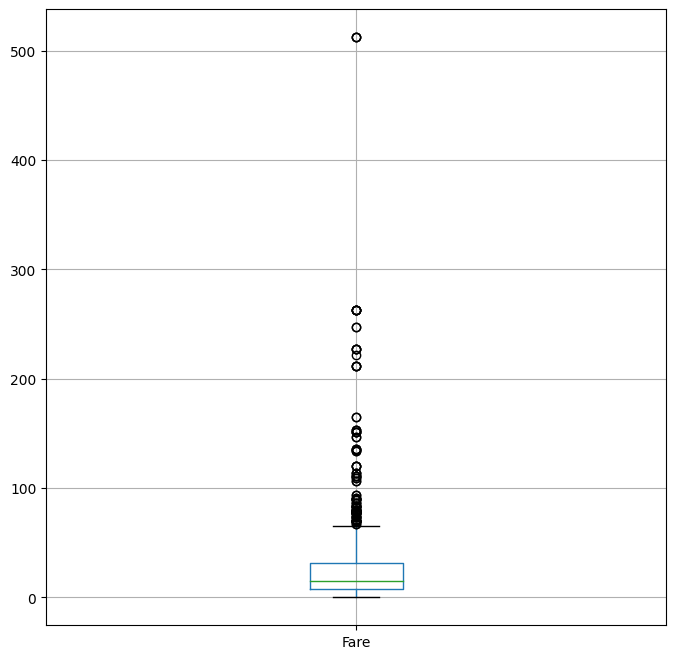

In [16]:
df.boxplot(column = 'Fare', figsize = (8,8))

In [17]:
new_df = df.query("Fare < 500")

<Axes: >

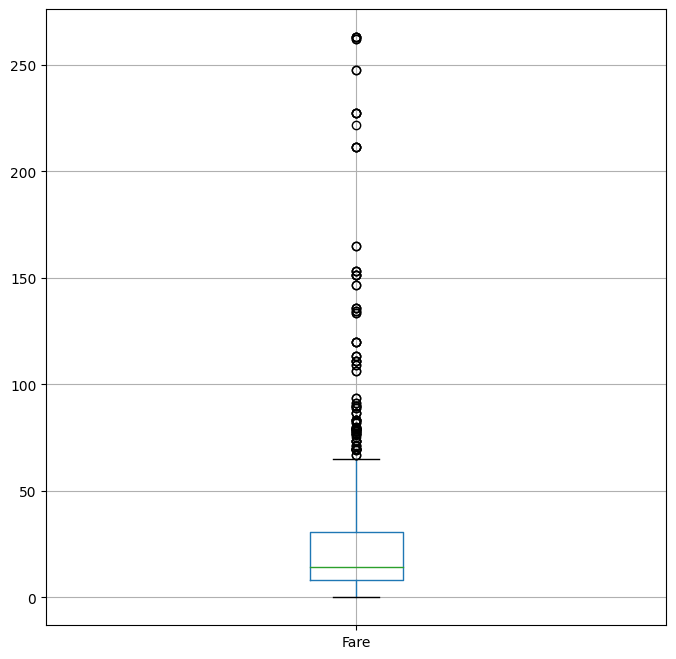

In [18]:
new_df.boxplot(column = 'Fare', figsize = (8,8))

In [19]:
new_Pclass = pd.Categorical(df["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [20]:
df["Pclass"] = new_Pclass
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,NaN,S
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [21]:
df["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [22]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
char_cabin = df["Cabin"].astype(str)  #converting data to str
new_cabin = np.array([cabin[0] for cabin in char_cabin])  #take the first letter from cabin
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [24]:
df["Cabin"] = new_cabin

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,n,S
887,888,1,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S
888,889,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,n,S
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C


In [26]:
cabin_sur = pd.crosstab(index = df["Cabin"], columns  = df["Survived"], margins = 1)
cabin_sur.columns = ("Survived", "Dead", "Total")
cabin_sur

,Survived,Dead,Total
Cabin,,,
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1
n,481,206,687
